# PRIMER PARCIAL
### Vladimir Abisai Espinosa Torrijos

# 1) Reproducir el análisis de PCA aplicado al Iris dataset, utilizando 3 componentes
### A) Indicar el porcentaje de la información utilizando los 3 componentes principalesdos

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from numpy.linalg import eig
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv(r"C:\Users\vladi\OneDrive\Documentos\datas\iris.csv")

df= data.iloc[:,:4]
df_std= pd.DataFrame(StandardScaler().fit_transform(df), columns= ['Sepal.Length',	'Sepal.Width',	'Petal.Length',	'Petal.Width'])
matriz_covarianza= df_std.cov()

valores, vectores= eig(matriz_covarianza)
valores_ordenados = np.sort(valores)[::-1]
varianza_total = np.sum(valores_ordenados)

varianza_3_principales = np.sum(valores_ordenados[:3])
porcentaje_3_principales = (varianza_3_principales / varianza_total) * 100
print(f"Los 3 primeros componentes principales explican el {porcentaje_3_principales:.2f}% de la varianza total.")


Los 3 primeros componentes principales explican el 99.48% de la varianza total.


### B) Hacer el scatter 3D

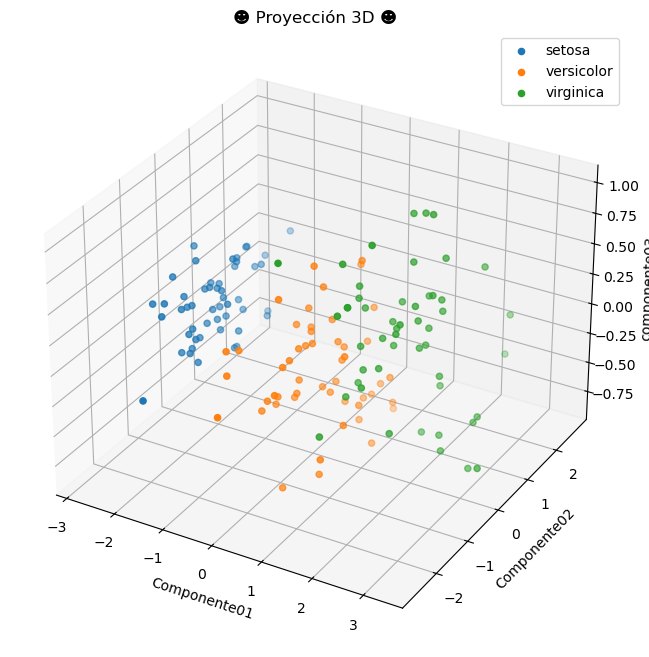

In [131]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_std)
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])
df_pca['Species'] = data['Species']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for especie in df_pca['Species'].unique():
    subset = df_pca[df_pca['Species'] == especie]
    ax.scatter(subset['PC1'], subset['PC2'], subset['PC3'], label=especie)

ax.set_xlabel('Componente01')
ax.set_ylabel('Componente02')
ax.set_zlabel('componente03')
ax.set_title('☻ Proyección 3D ☻ ')
ax.legend()
plt.show()


# 2) Realizar el análisis de PCA utilizando el dataset Brain_tumor, archivo Brain_tumor.csv
### A) Determinar el porcentaje de cada vector propio

In [133]:
brain_tumor = pd.DataFrame(pd.read_csv(r"C:\Users\vladi\OneDrive\Documentos\6to Semestre GIT\Neurociencias-2025-2\S03_datasets\Brain_tumor\Brain Tumor.csv"))
bt= brain_tumor.iloc[:,2:]

brain_tumor_std = pd.DataFrame(StandardScaler().fit_transform(bt), columns= ['Mean',	'Variance',	'Standard Deviation',	'Entropy',	'Skewness',	'Kurtosis',	'Contrast',	'Energy',	'ASM',	'Homogeneity',	'Dissimilarity',	'Correlation',	'Coarseness'])
matriz_covarianza= brain_tumor_std.cov()
valores, vectores= eig(matriz_covarianza)
valores_ordenados= np.sort(valores)
v = valores_ordenados[::-1]

varianza_total= np.sum(valores_ordenados)
x= 1

for val in v:
    print(f'Para el vector {x} el valor es: {val}')
    x+= 1


Para el vector 1 el valor es: 4.90710566189604
Para el vector 2 el valor es: 3.7568963661585926
Para el vector 3 el valor es: 1.545322419599041
Para el vector 4 el valor es: 0.7519814366221105
Para el vector 5 el valor es: 0.574289358417054
Para el vector 6 el valor es: 0.2401288546213146
Para el vector 7 el valor es: 0.1292258779436198
Para el vector 8 el valor es: 0.04012389901861934
Para el vector 9 el valor es: 0.030644821342535777
Para el vector 10 el valor es: 0.016703240958451215
Para el vector 11 el valor es: 0.010704217056218964
Para el vector 12 el valor es: 6.448715343101112e-05
Para el vector 13 el valor es: 0.0


### B) Determinar cuantos componentes principales son necesarios para obtener al menos un 90%

In [135]:
for val in v:
    p= val/varianza_total
    print(f'Porcentaje: {p*100}')


Porcentaje: 40.88167728688419
Porcentaje: 31.299147689886723
Porcentaje: 12.874263734077598
Porcentaje: 6.264846232358136
Porcentaje: 4.784472525710037
Porcentaje: 2.000541870970149
Porcentaje: 1.0765960635875287
Porcentaje: 0.3342769453504946
Porcentaje: 0.2553056288084286
Porcentaje: 0.13915667474024232
Porcentaje: 0.08917809752888425
Porcentaje: 0.0005372500975855767
Porcentaje: 0.0


De lo que podemos apreciar, se puede extraer al menos el 90% al utilizar los 4 primeros componentes (con un 91.3%)

### C) Realizar la proyección de la data original al espacio reducido mediante 2 métodos y comparar resultados
1er Metodo: Manual

In [138]:
idx = np.argsort(valores)[::-1]
vectores_ordenados = vectores[:, idx]
componentes_principales_manual = vectores_ordenados[:, :2]  

proyeccion_manual = brain_tumor_std @ componentes_principales_manual
df_pca_manual = pd.DataFrame(proyeccion_manual, columns=['PC1_manual', 'PC2_manual'])


2do metodo: sklearn

In [140]:
pca = PCA(n_components=2)
proyeccion_sklearn = pca.fit_transform(brain_tumor_std)
df_pca_sklearn = pd.DataFrame(proyeccion_sklearn, columns=['PC1_sklearn', 'PC2_sklearn'])


COMPARATIVA

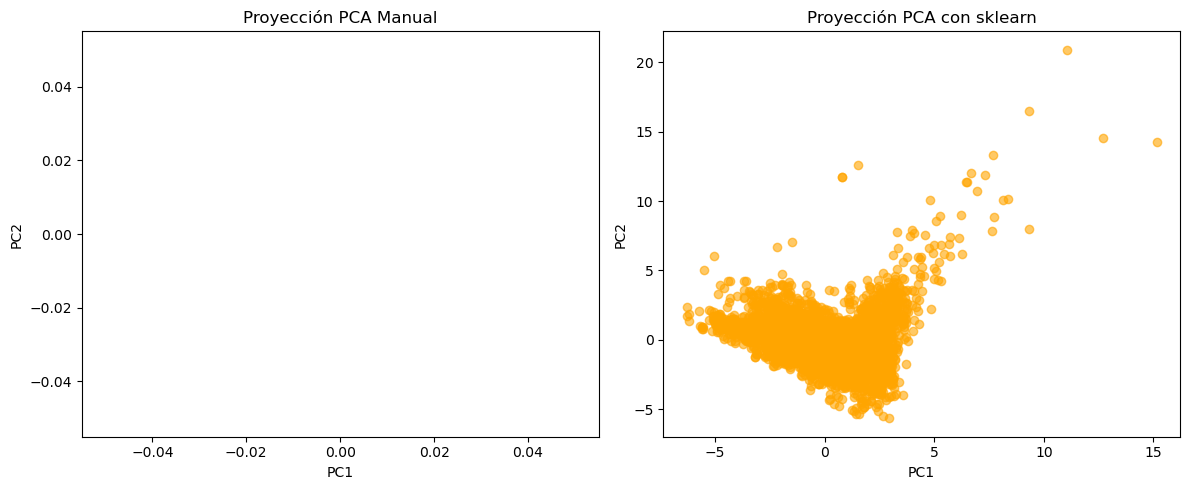

In [142]:
df_comparacion = pd.concat([df_pca_manual, df_pca_sklearn], axis=1)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(df_pca_manual['PC1_manual'], df_pca_manual['PC2_manual'], alpha=0.6)
plt.title("Proyección PCA Manual")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.subplot(1,2,2)
plt.scatter(df_pca_sklearn['PC1_sklearn'], df_pca_sklearn['PC2_sklearn'], alpha=0.6, color='orange')
plt.title("Proyección PCA con sklearn")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.tight_layout()
plt.show()

# D)Hacer la comparsión de los pairplot con la data original y la data proyectada

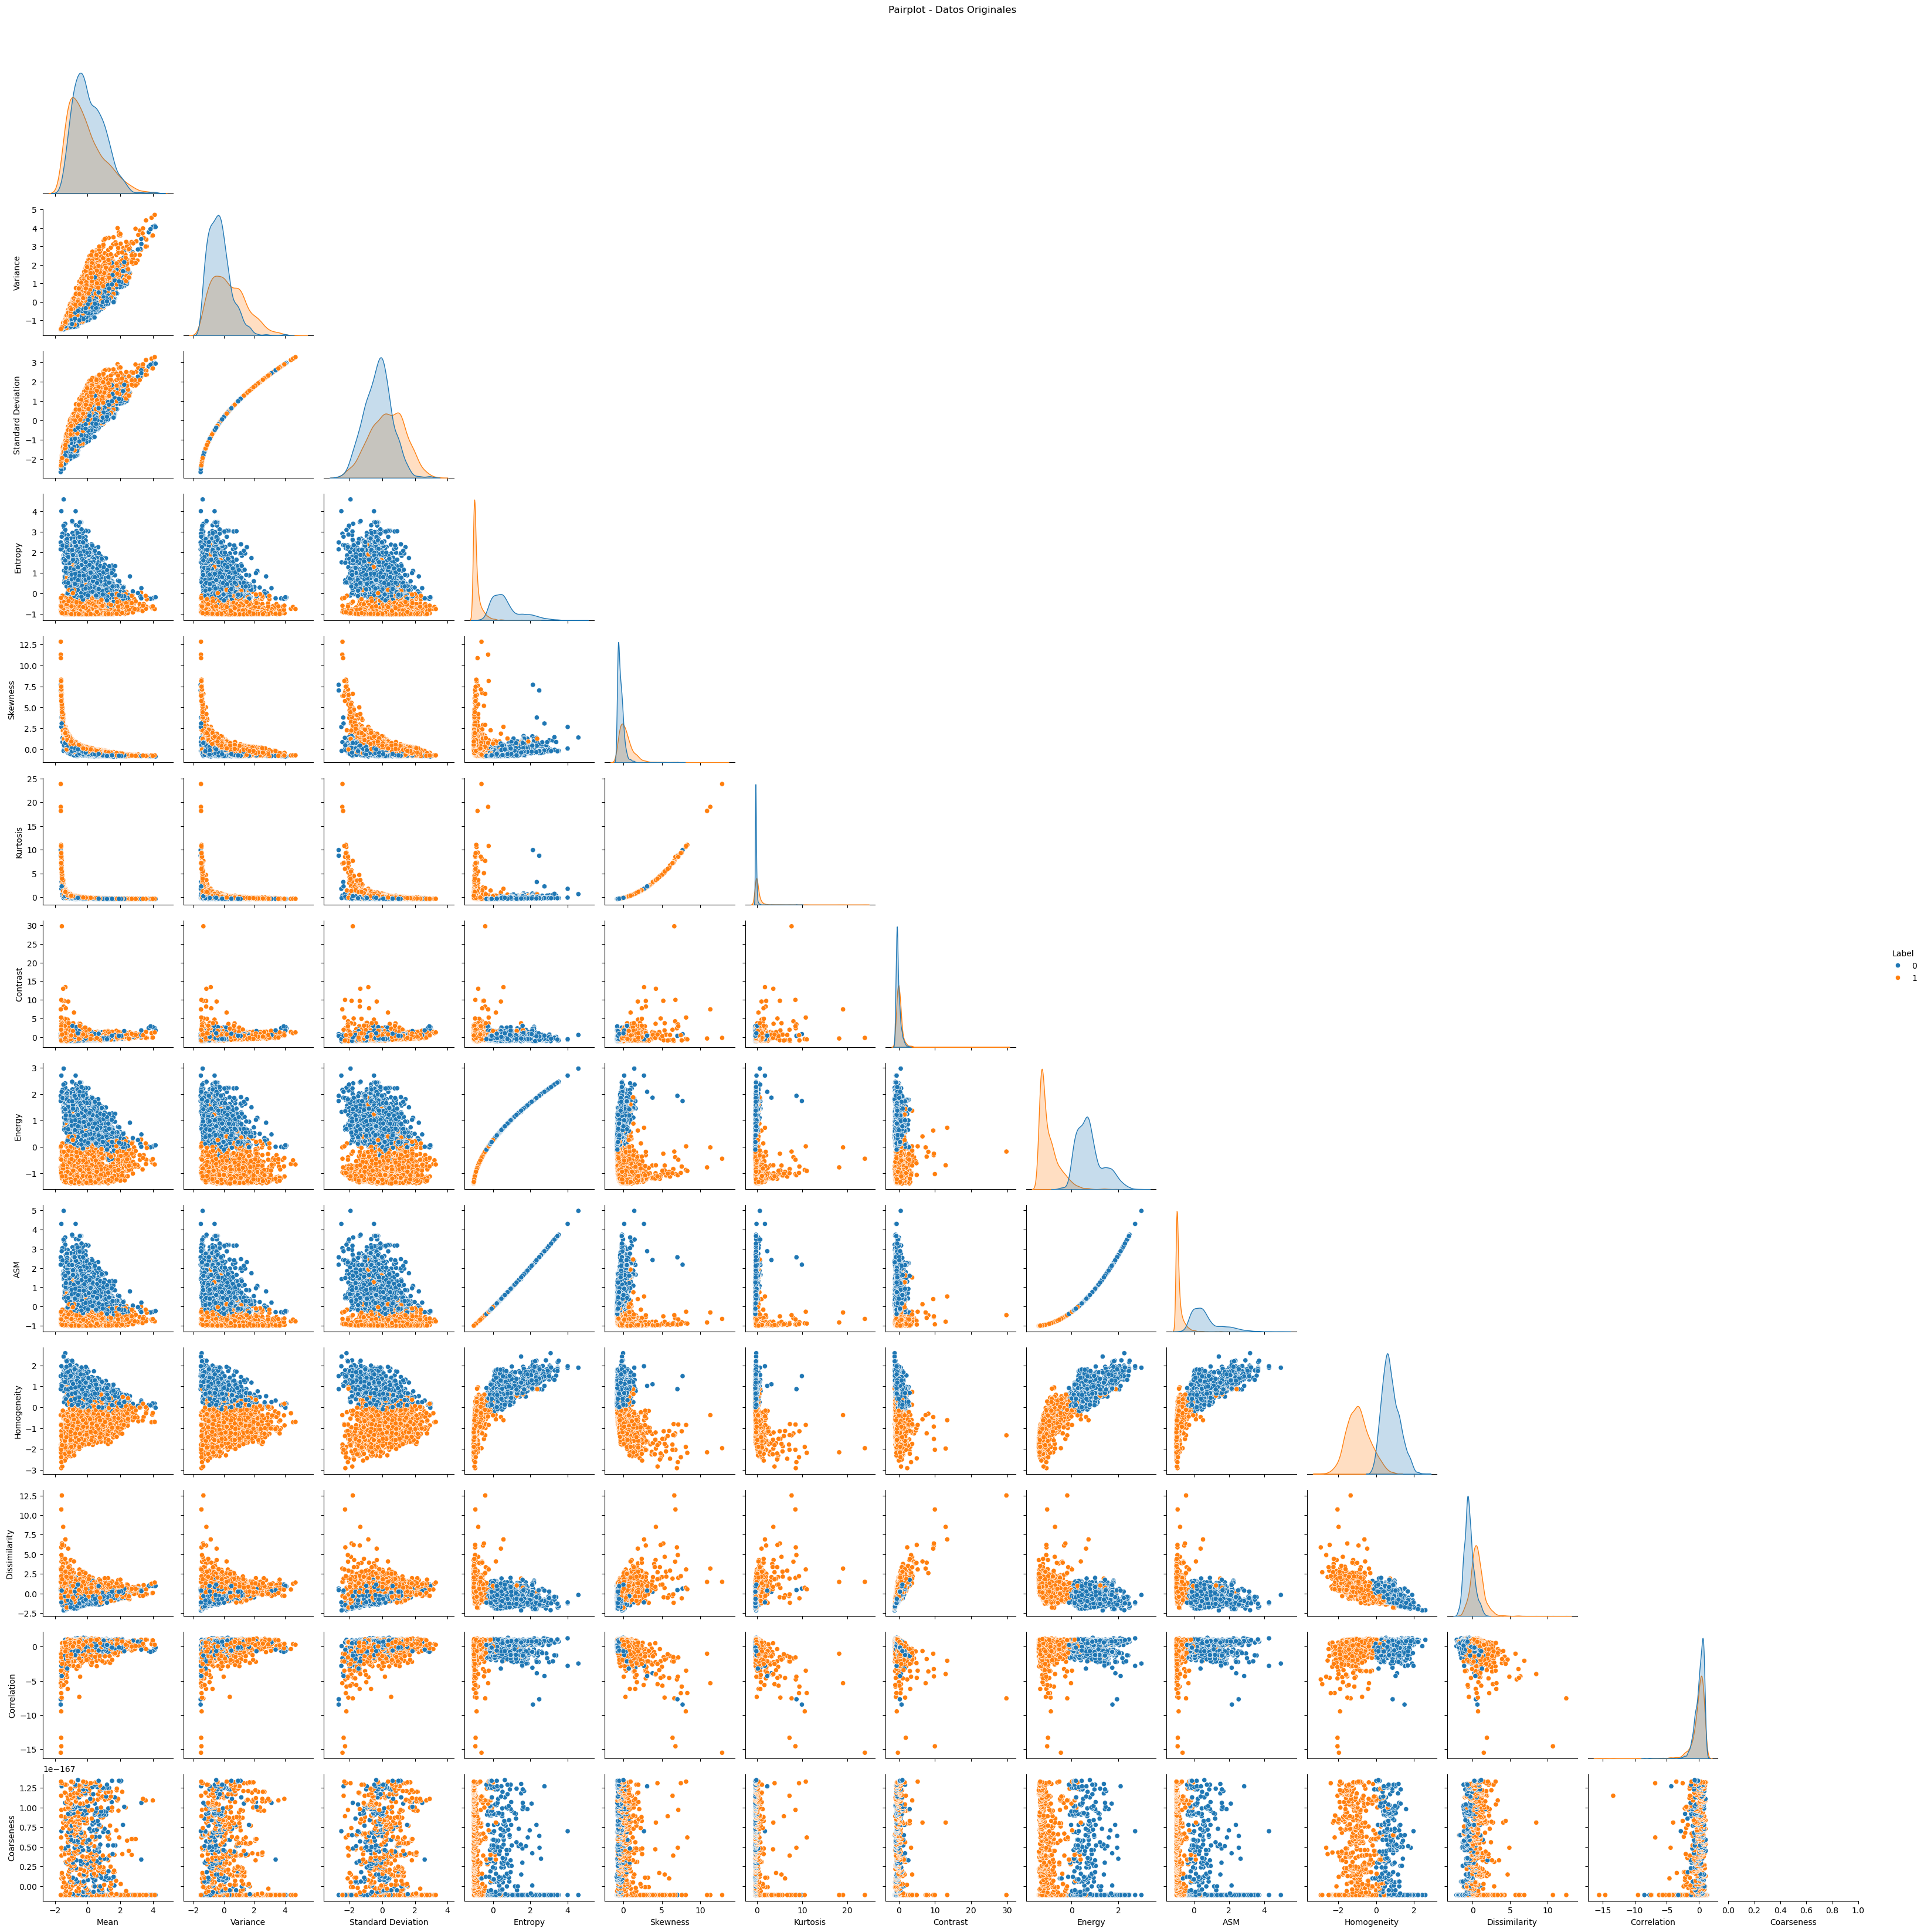

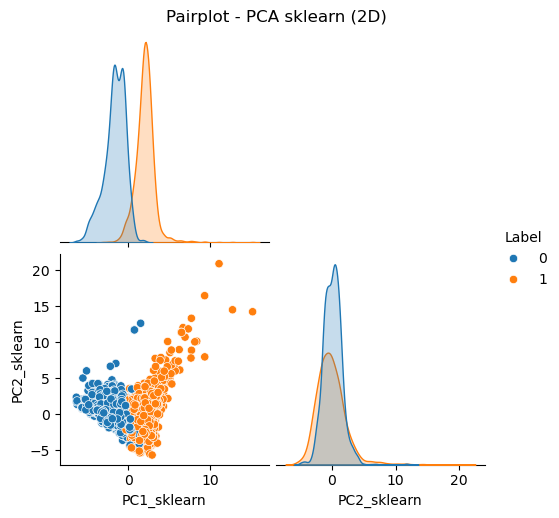

In [143]:
brain_tumor_std['Label'] = brain_tumor['Class']
sns.pairplot(brain_tumor_std, hue='Label', diag_kind='kde', corner=True)
plt.suptitle("Pairplot - Datos Originales", y=1.02)
plt.show()

df_pca_sklearn['Label'] = brain_tumor['Class']
sns.pairplot(df_pca_sklearn, hue='Label', diag_kind='kde', corner=True)
plt.suptitle("Pairplot - PCA sklearn (2D)", y=1.02)
plt.show()
